# Preprocessing

## Reading the standard-diff-log transformed time series (zdl-TS)

In [3]:
# from csv import writer
import pandas as pd
import numpy as np
isInKaggle = False
ROOT = '/kaggle/input/' if isInKaggle else 'D:/OneDrive - Universidade Federal do Cariri - UFCA/Drive/UFCA/Ensino/CRAN R_aulas/RClasses/'
LOCAL_DATA_FOLDER_NM =  'microbusinessDensityTS'#storeSalesTS
KAGGLE_CASE_FOLDER_NM = "godaddy-microbusiness-density-forecasting"#"store-sales-time-series-forecasting"
DATA_PATH = ROOT + KAGGLE_CASE_FOLDER_NM + '/' if isInKaggle else ROOT + "data/" + LOCAL_DATA_FOLDER_NM+"/"
RESULTS_PATH = "" if isInKaggle else ROOT + "results/" + LOCAL_DATA_FOLDER_NM+"/"


In [4]:
def readTranspostTS(filePath):
    retT = pd.read_csv(filePath, encoding='ISO-8859-1', header=0).T
    retT.columns = list(retT.iloc[0])
    retT.drop('Unnamed: 0', inplace = True)
    retT = retT.astype(dtype = 'float64', copy=True)
    print('>>> Time Series reading complited!!')
    return(retT)
zdl_ts_train_validation = readTranspostTS(filePath=DATA_PATH+"zdl_ts_train_validation.csv")
zdl_ts_train_validation.tail(3)

>>> Time Series reading complited!!


,zc_daycount,zc_dayofyear,zc_month,zc_year,zdl_l_out_y_1001,zdl_l_out_y_1003,zdl_l_out_y_1005,zdl_l_out_y_1007,zdl_l_out_y_1009,zdl_l_out_y_1011,...,zdl_u_out_y_56029(t+8),zdl_u_out_y_56031(t+8),zdl_u_out_y_56033(t+8),zdl_u_out_y_56035(t+8),zdl_u_out_y_56037(t+8),zdl_u_out_y_56039(t+8),zdl_u_out_y_56041(t+8),zdl_u_out_y_56043(t+8),zdl_u_out_y_56045(t+8),zmzdl_u_out(t+8)
2022-08-01,1.510490,0.381609,0.385700,1.319456,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01,1.599342,0.681977,0.680647,1.319456,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-01,1.688194,0.972656,0.975594,1.319456,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
import random
random.sample(list(zdl_ts_train_validation.columns), 10)

['zdly_42023(t+3)',
 'zdl_u_out_y_22083(t-6)',
 'zdl_u_out_y_48145(t+7)',
 'zdl_l_out_y_48441(t-3)',
 'zdl_l_out_y_42043(t-4)',
 'zdl_u_out_y_46101(t-4)',
 'zdl_l_out_y_36059(t+5)',
 'zdl_l_out_y_46125(t+3)',
 'zdl_l_out_y_19173(t-2)',
 'zdl_l_out_y_21003(t+8)']

In [6]:
futureLaged_ts_train_validation = readTranspostTS(filePath=DATA_PATH+"futureLaged_ts_train_validation.csv")#, index_col='date')
futureLaged_ts_train_validation.head(3)

>>> Time Series reading complited!!


,y_1001,y_1003,y_1005,y_1007,y_1009,y_1011,y_1013,y_1015,y_1017,y_1019,...,y_56027(t+8),y_56029(t+8),y_56031(t+8),y_56033(t+8),y_56035(t+8),y_56037(t+8),y_56039(t+8),y_56041(t+8),y_56043(t+8),y_56045(t+8)
2019-08-01,3.007682,7.239156,1.073138,1.310777,1.544148,0.926372,0.674981,2.691544,1.486542,1.104277,...,1.269680,5.979319,3.469299,34.142807,6.965306,3.293302,27.119463,4.195900,2.683045,1.554960
2019-09-01,2.884870,7.290936,0.995794,1.305176,1.575892,0.998556,0.739265,2.703752,1.355156,1.089747,...,1.320467,6.005279,3.483815,40.916836,7.257743,3.311873,27.414764,4.443527,2.731534,1.608579
2019-10-01,3.055843,7.425439,1.160149,1.254761,1.546415,0.974495,0.713551,2.693764,1.355156,1.084903,...,1.371254,6.022585,3.498331,40.192570,7.297621,3.126161,27.506041,4.450406,2.699208,1.662198


In [7]:
import random
random.sample(list(futureLaged_ts_train_validation.columns), 10)

['y_42067(t+4)',
 'y_5125(t+3)',
 'y_30087(t+6)',
 'y_39151(t+6)',
 'y_49041(t+2)',
 'y_42061(t+7)',
 'y_18127(t+4)',
 'y_17117(t+8)',
 'y_51061(t+1)',
 'y_45077(t+7)']

### Taking the label of the zdl-target variables

In [8]:
problemLabel = 'zdly_'
zdl_targetsNms = [zdl_Column for zdl_Column in zdl_ts_train_validation.columns if (problemLabel in zdl_Column) and ('(t' not in zdl_Column) and ('_out_' not in zdl_Column)]
nTargets = len(zdl_targetsNms) #2#you can increase nTargets if you wish
zdl_targetsNms = zdl_targetsNms[:nTargets]
print('nTargets = ', nTargets)
print('some targets: ', random.sample(zdl_targetsNms, 10))

nTargets =  3135
some targets:  ['zdly_27001', 'zdly_16071', 'zdly_56007', 'zdly_24037', 'zdly_45009', 'zdly_30029', 'zdly_29215', 'zdly_37073', 'zdly_55015', 'zdly_16009']


In [9]:
caseLabel = 'y_1001'
zdl_ts_train_validation[[case for case in zdl_ts_train_validation.columns if caseLabel in case]].head(3)

,zdl_l_out_y_1001,zdl_u_out_y_1001,zdly_1001,zdly_1001(t-1),zdl_l_out_y_1001(t-1),zdl_u_out_y_1001(t-1),zdly_1001(t-2),zdl_l_out_y_1001(t-2),zdl_u_out_y_1001(t-2),zdly_1001(t-3),...,zdl_u_out_y_1001(t+5),zdly_1001(t+6),zdl_l_out_y_1001(t+6),zdl_u_out_y_1001(t+6),zdly_1001(t+7),zdl_l_out_y_1001(t+7),zdl_u_out_y_1001(t+7),zdly_1001(t+8),zdl_l_out_y_1001(t+8),zdl_u_out_y_1001(t+8)
2019-08-01,1.0,0.0,-2.028906,-2.028906,1.0,0.0,-2.028906,1.0,0.0,-2.028906,...,0.0,-1.050831,0.0,0.0,0.253258,0.0,0.0,0.914145,0.0,0.0
2019-09-01,1.0,0.0,-2.028906,-2.028906,1.0,0.0,-2.028906,1.0,0.0,-2.028906,...,0.0,0.253258,0.0,0.0,0.914145,0.0,0.0,-0.047310,0.0,0.0
2019-10-01,0.0,1.0,2.520259,-2.028906,1.0,0.0,-2.028906,1.0,0.0,-2.028906,...,0.0,0.914145,0.0,0.0,-0.047310,0.0,0.0,0.098656,0.0,0.0


In [10]:
random.sample(zdl_targetsNms, 10)

['zdly_28091',
 'zdly_37089',
 'zdly_28053',
 'zdly_29185',
 'zdly_13271',
 'zdly_12121',
 'zdly_37017',
 'zdly_16071',
 'zdly_6001',
 'zdly_5051']

## Determining the features and targets

In [11]:
import random
aggregatedVarNm = 'zmzdl'
z_calendarFeatures = ['zc_daycount', 'zc_dayofyear', 'zc_month', 'zc_year']#'dayofweek','dayofmonth', ]
# lag targets
# the future of the time series:
lagTargetsNms = [
    lagedVarNm for lagedVarNm in futureLaged_ts_train_validation.columns if 
      ('(t+' not in lagedVarNm) and (aggregatedVarNm not in lagedVarNm)]
zdl_lagTargetsNms = [lagedVarNm for lagedVarNm in zdl_ts_train_validation.columns if 
      ('zdly_' in lagedVarNm) and ('(t-' not in lagedVarNm) and 
      ('(t+' not in lagedVarNm) and ('_out_' not in lagedVarNm)]
    #   and  (aggregatedVarNm not in lagedVarNm)]
# Lag variables
# featuresNms = [
#     lagedVarNm for lagedVarNm in ts_train_validation.columns if 
#           ('(t-' in lagedVarNm) #and 
#       #     (aggregatedVarNm in lagedVarNm)
#           ]
#zdl-based outilier indicator variables
# zdl_featuresNms =  zdl_l_outlier_targetNms + zdl_u_outlier_targetNms
# based on them, the future of the time serises will be forecasted:
# the present values of the series. Without the copy, both objects point to the same place (thus, becoming the same object)
# featuresNms += [aggregatedVarNm]  # + targetsNms.copy()
# the past values of the time series:
# zdl_featuresNms = zdl_targetsNms.copy() 
zdl_featuresNms = z_calendarFeatures.copy()
zdl_featuresNms +=    [lagedVarNm for lagedVarNm in zdl_ts_train_validation.columns if 
        #   ('zdl_' in lagedVarNm) and 
          #('zdly_' in lagedVarNm) and 
          ('(t-1' in lagedVarNm  or '(t-2' in lagedVarNm) 
          #and ('_out_' not in lagedVarNm)
          and (aggregatedVarNm not in lagedVarNm)
          ]
# Calendar variables:
# random.seed(0)
print('>>> Thus, for ', len(zdl_targetsNms), ' mbd time series, there are ', len(zdl_featuresNms),
      ' features (predictive variables).', 
      '\n || Some of these features: \n ',
      random.sample(zdl_featuresNms, 10))
print('>>> In turn, there are ', len(zdl_lagTargetsNms), ' targets (dependent variables).',
      '\n || Some of these targets in the zdl and original scales: \n ')
pd.DataFrame({'zdl': zdl_lagTargetsNms, 'original': lagTargetsNms})

>>> Thus, for  3135  mbd time series, there are  18814  features (predictive variables). 
 || Some of these features: 
  ['zdl_u_out_y_12005(t-1)', 'zdl_u_out_y_22067(t-1)', 'zdly_21197(t-1)', 'zdl_u_out_y_12121(t-1)', 'zdly_1105(t-1)', 'zdly_20105(t-1)', 'zdl_u_out_y_48057(t-2)', 'zdl_l_out_y_35013(t-1)', 'zdly_26031(t-2)', 'zdl_l_out_y_51139(t-1)']
>>> In turn, there are  3135  targets (dependent variables). 
 || Some of these targets in the zdl and original scales: 
 


,zdl,original
0,zdly_1001,y_1001
1,zdly_1003,y_1003
2,zdly_1005,y_1005
3,zdly_1007,y_1007
4,zdly_1009,y_1009
...,...,...
3130,zdly_56037,y_56037
3131,zdly_56039,y_56039
3132,zdly_56041,y_56041
3133,zdly_56043,y_56043


In [12]:
zdl_ts_train_validation[zdl_featuresNms].head(1)

,zc_daycount,zc_dayofyear,zc_month,zc_year,zdly_1001(t-1),zdly_1003(t-1),zdly_1005(t-1),zdly_1007(t-1),zdly_1009(t-1),zdly_1011(t-1),...,zdl_u_out_y_56027(t-2),zdl_u_out_y_56029(t-2),zdl_u_out_y_56031(t-2),zdl_u_out_y_56033(t-2),zdl_u_out_y_56035(t-2),zdl_u_out_y_56037(t-2),zdl_u_out_y_56039(t-2),zdl_u_out_y_56041(t-2),zdl_u_out_y_56043(t-2),zdl_u_out_y_56045(t-2)
2019-08-01,-1.688194,0.381609,0.3857,-1.707531,-2.028906,0.161282,-1.641972,-0.21043,1.040223,1.796772,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [13]:
zdl_ts_train_validation[zdl_lagTargetsNms].head(1)

,zdly_1001,zdly_1003,zdly_1005,zdly_1007,zdly_1009,zdly_1011,zdly_1013,zdly_1015,zdly_1017,zdly_1019,...,zdly_56027,zdly_56029,zdly_56031,zdly_56033,zdly_56035,zdly_56037,zdly_56039,zdly_56041,zdly_56043,zdly_56045
2019-08-01,-2.028906,0.161282,-1.641972,-0.21043,1.040223,1.796772,0.254454,0.252249,-2.935665,-0.342663,...,-0.294843,-0.339479,-1.749026,-0.034563,-0.104101,2.468208,0.501311,-1.540504,0.762782,-0.581612


## Spliting strategies

### Spliting with sklearn.model_selection
Here, one has random selected rows for training and validating. Caution must be taken in this case, once it breaks the chronological sequence of the time series.

In [14]:
# Train / Validation split
from sklearn.model_selection import train_test_split
def get_sklearn_train_test_split(pTrain=.8, ts_train_validation=zdl_ts_train_validation,
                                  featuresNms=zdl_featuresNms, targetsNms=zdl_lagTargetsNms, 
                                  isToPrintShapes=False):
    x_train_valid = ts_train_validation[featuresNms]
    y_train_valid = ts_train_validation[targetsNms]
    x_train, x_valid, y_train, y_valid = train_test_split(
        x_train_valid, y_train_valid, test_size=(1-pTrain), random_state=0)
    if isToPrintShapes:
        print('x_train.shape: ', x_train.shape)
        print('y_train.shape: ', y_train.shape)
        print('x_valid.shape: ', x_valid.shape)
        print('y_valid.shape: ', y_valid.shape)
    return x_train, x_valid, y_train, y_valid
# x_train, x_valid, y_train, y_valid = get_sklearn_train_test_split(isToPrintShapes=True)


### Usual way to split time series between train and validation sets
Here the first part of the data is used for training and the last for validating the predictors.

In [15]:
# Train / Validation split
def get_usual_ts_train_validation_split(pTrain=.8, ts_train_validation=zdl_ts_train_validation,
                                  featuresNms=zdl_featuresNms, targetsNms=zdl_lagTargetsNms, 
                                  isToPrintShapes=False):
    n_m = len(ts_train_validation)  # size of the full training set
    n = round(pTrain*n_m)  # size of the training set for modeling
    m = n_m - n  # size of the training set for validation
    # splitDate = ts_train_validation.index.values[n-1]  # end date for training
    # print('splitDate: ', splitDate)
    ts_train = ts_train_validation.iloc[:n]#ts_train_validation.index <= splitDate]
    ts_validation = ts_train_validation.iloc[n:]#ts_train_validation.index > splitDate]

    x_train = None 
    x_valid = None 
    if featuresNms is not None:
         x_train = ts_train[featuresNms]
         x_valid = ts_validation[featuresNms]
        #  x_train.index
    y_train = ts_train[targetsNms]
    y_valid = ts_validation[targetsNms]
    if isToPrintShapes:
        if featuresNms is not None:
            print('x_train.shape: ', x_train.shape)
        print('y_train.shape: ', y_train.shape)
        if featuresNms is not None:
            print('x_valid.shape: ', x_valid.shape)
        print('y_valid.shape: ', y_valid.shape)
    return x_train, x_valid, y_train, y_valid, n, m
zdlx_train, zdlx_valid, zdly_train, zdly_valid, n, m = get_usual_ts_train_validation_split(pTrain=.8, ts_train_validation=zdl_ts_train_validation,
                                  featuresNms=zdl_featuresNms, targetsNms=zdl_lagTargetsNms, isToPrintShapes=True)
print('train set end: ', zdlx_train.index[n-1])
print('validation set begin: ', zdlx_valid.index.values[0])
print('>>> Here, we have the first ', n,
      ' instances for effectively training the models and the last ', m, ' for validating them.')


x_train.shape:  (31, 18814)
y_train.shape:  (31, 3135)
x_valid.shape:  (8, 18814)
y_valid.shape:  (8, 3135)
train set end:  2022-02-01
validation set begin:  2022-03-01
>>> Here, we have the first  31  instances for effectively training the models and the last  8  for validating them.


#### Some intuition

In [16]:
pd.concat([zdly_train.head(1), zdly_train.tail(1),
           zdly_valid.head(1), zdly_valid.tail(1)], axis=0).head()


,zdly_1001,zdly_1003,zdly_1005,zdly_1007,zdly_1009,zdly_1011,zdly_1013,zdly_1015,zdly_1017,zdly_1019,...,zdly_56027,zdly_56029,zdly_56031,zdly_56033,zdly_56035,zdly_56037,zdly_56039,zdly_56041,zdly_56043,zdly_56045
2019-08-01,-2.028906,0.161282,-1.641972,-0.210430,1.040223,1.796772,0.254454,0.252249,-2.935665,-0.342663,...,-0.294843,-0.339479,-1.749026,-0.034563,-0.104101,2.468208,0.501311,-1.540504,0.762782,-0.581612
2022-02-01,0.414389,0.387548,0.348948,1.043827,0.657191,0.608205,-0.358483,0.069076,0.713698,2.922970,...,-1.225503,-0.185599,0.333774,-0.125011,0.293734,-0.513680,-0.276068,1.525327,-0.171207,-0.134013
2022-03-01,-0.087271,0.586246,-0.232163,1.282454,0.469014,1.278384,-0.080989,0.222253,0.535338,-2.386514,...,-0.294843,1.188331,-0.261684,-0.203359,1.052866,-0.625364,0.577772,0.605493,-0.345528,0.279314
2022-10-01,0.171051,-0.085071,0.440915,-1.189959,-1.136467,0.237982,-0.142133,-0.324429,-1.264485,-0.332011,...,-1.261874,0.357905,0.939329,4.034187,-0.315301,0.023067,0.519416,0.233702,-1.011699,-0.134013


In [17]:
random.sample(list(zdlx_train.columns), 4)

['zdl_u_out_y_8125(t-1)',
 'zdl_u_out_y_48449(t-2)',
 'zdly_13237(t-2)',
 'zdl_u_out_y_38039(t-2)']

In [18]:
random.sample(list(zdly_train.columns), 4)

['zdly_42017', 'zdly_36037', 'zdly_31145', 'zdly_13051']

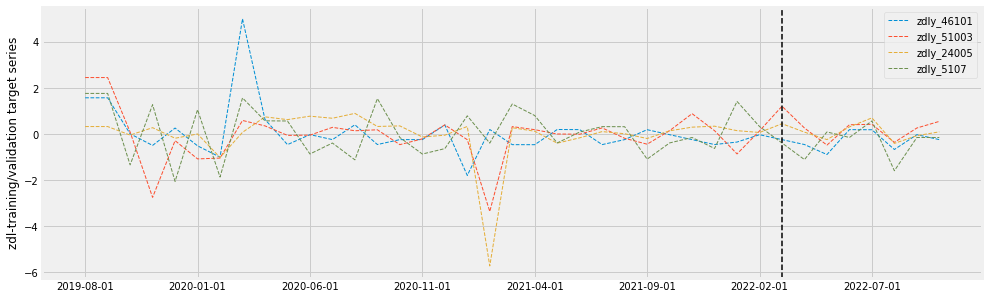

In [19]:
# https://www.kaggle.com/code/robikscube/time-series-forecasting-with-machine-learning-yt
import matplotlib.pyplot as plt
import seaborn as sns
import random

plt.style.use('fivethirtyeight')
color_palette = sns.color_palette()
nTrials = 4
trialCases = random.sample(list(zdly_train.columns), nTrials)
fig, ax = plt.subplots(figsize=(15, 5))
zdl_ts_train_validation[trialCases].plot(ax=ax, color=color_palette[:nTrials], style='--', linewidth=1,
                                ylabel='zdl-training/validation target series')
ax.axvline(n, color='black', ls='--', linewidth=1.5)
ax.legend(trialCases)
plt.show();


# Regression

## Pipelines for tranforming the predictor variables

In [20]:
# from sklearn.pipeline import Pipeline 
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler#, MinMaxScaler
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# qualiVars = []#In this particular TS approach, we do not have quali variables 
# quantiVars = featuresNms
 
# quantiPipeline = Pipeline([('imputer', SimpleImputer(strategy = "median", add_indicator = True)), 
#                            ('std_scaler', StandardScaler())]) #MinMaxScaler(feature_range  = (.4, .6))
# # quantiOk = pd.DataFrame(quantiPipeline.fit_transform(quantiDf), columns=quantiPipeline.get_feature_names_out())
# # quantiOk.head()
# fullPipeline = ColumnTransformer([("quanti", quantiPipeline, quantiVars), 
#                                   ("quali", OneHotEncoder(), qualiVars)]) 
# fullPipeline


In [21]:
# x_train = fullPipeline.fit_transform(x_train)
# x_valid = fullPipeline.transform(x_valid)
# # x_train = pd.DataFrame(fullPipeline.fit_transform(train), columns=fullPipeline.get_feature_names_out())
# # x_train.head()
# print('>>> x_train:', x_train[:2])
# print('>>> x_valid:', x_valid[:2])
# print('>>> x_valid Data Frame:')
# pd.DataFrame(x_valid, columns=fullPipeline.get_feature_names_out()).head()

## Models Fitting, Saving, Reading, Prediction, and Performance Evaluation

In [22]:
# get and save models
import joblib
from tensorflow import keras
import os
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error, \
     r2_score, mean_absolute_percentage_error
# import pickle

# Fitting


def getModel(modelObj, x_train, y_train, x_valid, y_valid, optObj=None,
             verbose=False, epochs=150, batch_size=32,
             validation_split=.2, n_jobs=4, buildForce=False):
    formalism = type(modelObj).__name__
    fittingObj = optObj if optObj is not None else modelObj
    if formalism == 'XGBRegressor':
        eval_set = [(x_valid, y_valid)]
        fittingObj.fit(x_train, y_train, eval_set=eval_set, #eval_metric="rmsle", 
                       verbose=verbose)
    elif formalism == 'LGBMRegressor':
        eval_set = [(x_valid, y_valid)]
        fittingObj.fit(x_train, y_train, eval_set=eval_set,
                       eval_metric="rmsle", verbose=verbose)
    elif formalism == 'KerasRegressor':
        early_stopping_cb = keras.callbacks.EarlyStopping(
            monitor='val_loss', patience=10, restore_best_weights=True)
        fittingObj.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                       validation_split=validation_split, callbacks=[early_stopping_cb])
    else:
        try:
            fittingObj.fit(x_train, y_train)
        except Exception:
            try:
                fittingObj.fit(x_train, y_train.values)
            except Exception:
                try:
                    fittingObj.fit(x_train, y_train.values.ravel())
                except Exception:
                    print('>>>>>> Trouble in ', formalism,
                          ' <<<<<<< \n', Exception)
                return None
                # pass

    return (fittingObj)
# Saving and reading the models
# models saving

# https://mljar.com/blog/save-load-random-forest/


def saveModel(model, folder='/', label=''):
    # for model in models:
    modelNm = type(model).__name__ + '_' + label
    modelPath = RESULTS_PATH+folder+modelNm + '.joblib'
    # with open(modelPath, 'wb') as f:
    # pickle.dump(model, f)
    joblib.dump(model, modelPath, compress=3)
    print('>>> ', modelNm, ' saved!')
# models loading


def getSavedModel(emptModel, folder='/', label=''):
    savedModel = None
    # for model in emptModels:
    modelPath = RESULTS_PATH+folder + \
        type(emptModel).__name__ + '_' + label + '.joblib'
    # with open(modelPath, 'rb') as f:
    try:
        savedModel = joblib.load(modelPath)
    except Exception:
        print('>>> TROUBLE IN getSavedModel: \n', Exception)
        pass
    return (savedModel)

In [35]:
zdl_ts_train_validation[zdl_featuresNms].values[0]

array([-1.6881943 ,  0.38160912,  0.38570012, ...,  0.        ,
        0.        ,  0.        ])

In [21]:
# models prediction
import sys
import joblib
l_ts_train_validation = pd.read_csv(DATA_PATH+"l_ts_train_validation.csv", index_col='date')
l_targetsNms = l_ts_train_validation.columns

zdl_scaler = joblib.load(RESULTS_PATH + 'zdl_scaler.joblib')
n_zdl_scaler_repetition = round(zdly_train.shape[1]/len(zdl_scaler.mean_))
zdl_scaler_mean_ = (list(zdl_scaler.mean_)*n_zdl_scaler_repetition)
zdl_scaler_scale_ = (list(zdl_scaler.scale_)*n_zdl_scaler_repetition)

ly_minus_1 = sum(l_ts_train_validation[l_targetsNms]
                 [:n_zdl_scaler_repetition].values.tolist(), [])
ly_n_1 = sum(l_ts_train_validation[l_targetsNms][(
    n-n_zdl_scaler_repetition):n].values.tolist(), [])
ly_nm_1 = sum(l_ts_train_validation[l_targetsNms].tail(
    n_zdl_scaler_repetition).values.tolist(), [])

def getPrediction(model, x, phase='train'):
    zdly_pred = None; y_pred = None; ly_t_1 = None; t0=-1; predTimeHorizon = None; 
    if phase == 'test':
        ly_t_1 = ly_nm_1
        t0=n+m-1
        predTimeHorizon = m
        zdly_pred = np.ndarray(shape=(predTimeHorizon, zdly_valid.shape[1]), dtype=float)
        x[zdl_featuresNms][0] = 
        zdly_pred[0] = model.predict(x[0])
        
    else:
        zdly_pred = model.predict(x)  # zdl-based transformed TS forecasts
        predTimeHorizon = len(zdly_pred)
        if phase == 'train':
            ly_t_1 = ly_minus_1
            t0=0
        elif phase == 'validation':
            ly_t_1 = ly_n_1
            t0=n-1
    y_pred = np.ndarray(shape=zdly_pred.shape, dtype=float)
    try:
        for t in range(predTimeHorizon):
            zdly_pred_t = zdly_pred[t] 
            if phase == 'test':
                x ... zdl_ts_train_validation[zdl_featuresNms].tail(1)
            y_pred_t = np.ndarray(shape=zdly_pred_t.shape, dtype=float)
            for j in range(len(y_pred_t)):
                zdly_pred_tj = zdly_pred_t[j]
                m_j = zdl_scaler_mean_[j]
                s_j = zdl_scaler_scale_[j]
                dly_pred_tj = zdly_pred_tj*s_j + m_j
                ly_pred_tj = dly_pred_tj + ly_t_1[j]
                ly_t_1[j] = ly_pred_tj
                y_pred_tj = np.expm1(ly_pred_tj)
                if np.isfinite(y_pred_tj):
                    y_pred_tj = max(0, y_pred_tj)
                else:
                    y_pred_tj = sys.float_info.max
                y_pred_t[j] = y_pred_tj
            y_pred[t] = y_pred_t
            # ly_t_1 = l_ts_train_validation[l_targetsNms].iloc[t+t0,:].to_list()
            # if phase != 'test':
            if phase == 'train':
                ly_t_1 = sum(l_ts_train_validation[l_targetsNms]
                    [(t+t0):n_zdl_scaler_repetition].values.tolist(), [])
           # print('|t='+str(t)+' ok.. ', end='')
        print(' |'+phase+' ok.. ', end='')
    except Exception:
        print('>>>> TROUBLE IN getPrediction', Exception)
    # print(y_pred[:3])
    return y_pred


In [22]:
zdlx_valid.head(1)

,zc_daycount,zc_dayofyear,zc_month,zc_year,zdly_1001(t-1),zdly_1003(t-1),zdly_1005(t-1),zdly_1007(t-1),zdly_1009(t-1),zdly_1011(t-1),...,zdl_u_out_y_56027(t-2),zdl_u_out_y_56029(t-2),zdl_u_out_y_56031(t-2),zdl_u_out_y_56033(t-2),zdl_u_out_y_56035(t-2),zdl_u_out_y_56037(t-2),zdl_u_out_y_56039(t-2),zdl_u_out_y_56041(t-2),zdl_u_out_y_56043(t-2),zdl_u_out_y_56045(t-2)
2022-03-01,1.066228,-1.100853,-1.089036,1.319456,0.414389,0.387548,0.348948,1.043827,0.657191,0.608205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# models performance
def SMAPE(target, forecast):
    if not all([isinstance(target, np.ndarray), isinstance(forecast, np.ndarray)]):
        target, forecast = np.array(target), np.array(forecast)
    SAPE = np.abs(target - forecast) / ((np.abs(forecast) + np.abs(target))/2)
    SAPE[np.isnan(SAPE)] = 0  # in the case of target=forecast=0
    return round(np.mean(SAPE), 4)

models_label = []
models_r2_t = []; models_r2_v = []
models_rmse_t = []; models_rmse_v = []
models_rmsle_t = []; models_rmsle_v = []
models_mae_t = []; models_mae_v = []
models_mape_t = []; models_mape_v = []
models_smape_t = []; models_smape_v = []

x_train_origin, x_valid_origin, y_train_origin, y_valid_origin, n, m = get_usual_ts_train_validation_split(
    isToPrintShapes=True, targetsNms=lagTargetsNms, featuresNms=None,
    ts_train_validation = futureLaged_ts_train_validation)


def printPerformanceMeasures(model, label, x_train = zdlx_train, x_valid = zdlx_valid):
    # for model in models:
    y_train_predict = getPrediction(model, x_train, phase='train')
    y_valid_predict = getPrediction(model, x_valid, phase='validation')

    formalism = type(model).__name__
    models_label.append(formalism+'_'+label)
    models_r2_t.append(
        float(format(r2_score(y_true=y_train_origin, y_pred=y_train_predict), '.2g')))
    models_r2_v.append(
        float(format(r2_score(y_true=y_valid_origin, y_pred=y_valid_predict),  '.2g')))
    models_rmse_t.append(float(format(
        mean_squared_error(y_true=y_train_origin, y_pred=y_train_predict, squared=False), '.2g')))
    models_rmse_v.append(float(format(
        mean_squared_error(y_true=y_valid_origin, y_pred=y_valid_predict, squared=False), '.2g')))
    # models_rmsle_t.append(float(format(
    #     mean_squared_log_error(y_true=y_train_origin, y_pred=y_train_predict, squared=False), '.2g')))
    # models_rmsle_v.append(float(format(
    #     mean_squared_log_error(y_true=y_valid_origin, y_pred=y_valid_predict, squared=False), '.2g')))
    models_mae_t.append(float(format(mean_absolute_error(
        y_true=y_train_origin, y_pred=y_train_predict), '.2g')))
    models_mae_v.append(float(format(mean_absolute_error(
        y_true=y_valid_origin, y_pred=y_valid_predict), '.2g')))
    models_mape_t.append(float(format(mean_absolute_percentage_error(
        y_true=y_train_origin, y_pred=y_train_predict), '.2g')))
    models_mape_v.append(float(format(mean_absolute_percentage_error(
        y_true=y_valid_origin, y_pred=y_valid_predict), '.2g')))
    models_smape_t.append(float(format(SMAPE(y_train_origin, y_train_predict), '.2g')))
    models_smape_v.append(float(format(SMAPE(y_valid_origin, y_valid_predict), '.2g')))
    df = pd.DataFrame({'model': models_label,
                       'mape-t': models_mape_t,
                       'mape-v': models_mape_v,
                       'smape-t': models_smape_t,
                       'smape-v': models_smape_v}
                    #    'rmsle-t': models_rmsle_t,
                    #    'rmsle-v': models_rmsle_v,
                    #    'r2-t': models_r2_t,
                    #    'r2-v': models_r2_v}  # ,
                      #    'rmse-t': models_rmse_t,
                      #    'rmse-v': models_rmse_v,
                      #    'mae-t': models_mae_t,
                      #    'mae-v': models_mae_v}
                      )
    print(" *********** Rank via SMAPE in the validation set *********** ")
    # .head(len(df))
    print(df.sort_values(
        by=["smape-v", 'smape-t'], ascending=True))


y_train.shape:  (31, 3135)
y_valid.shape:  (8, 3135)


In [24]:
l_ts_train_validation.head(3)

,ly_1001,ly_1003,ly_1005,ly_1007,ly_1009,ly_1011,ly_1013,ly_1015,ly_1017,ly_1019,...,ly_56027,ly_56029,ly_56031,ly_56033,ly_56035,ly_56037,ly_56039,ly_56041,ly_56043,ly_56045
date,,,,,,,,,,,,,,,,,,,,,
2019-08-01,1.388213,2.108898,0.729063,0.837584,0.933796,0.655638,0.515802,1.306045,0.910893,0.743972,...,0.765735,1.933850,1.621896,3.439882,1.962307,1.292090,3.311760,1.724910,1.281835,0.935542
2019-09-01,1.357090,2.115163,0.691042,0.835157,0.946196,0.692425,0.553462,1.309346,0.856607,0.737043,...,0.765735,1.930728,1.586899,3.487764,1.966005,1.350245,3.318245,1.674908,1.303889,0.928533
2019-10-01,1.400159,2.131256,0.770177,0.813044,0.934687,0.680313,0.538568,1.306646,0.856607,0.734723,...,0.765735,1.928850,1.589863,3.496218,1.971526,1.364467,3.322741,1.690173,1.290715,0.928533


## Kaggle Competition Submission File

### Some intuition

In [25]:
random.sample(zdl_targetsNms, 10)

['zdly_47159',
 'zdly_31051',
 'zdly_19111',
 'zdly_39137',
 'zdly_37083',
 'zdly_28005',
 'zdly_45075',
 'zdly_13299',
 'zdly_55033',
 'zdly_31147']

In [26]:
zdl_ts_train_validation[zdl_featuresNms].tail(1)

,zc_daycount,zc_dayofyear,zc_month,zc_year,zdly_1001(t-1),zdly_1003(t-1),zdly_1005(t-1),zdly_1007(t-1),zdly_1009(t-1),zdly_1011(t-1),...,zdl_u_out_y_56027(t-2),zdl_u_out_y_56029(t-2),zdl_u_out_y_56031(t-2),zdl_u_out_y_56033(t-2),zdl_u_out_y_56035(t-2),zdl_u_out_y_56037(t-2),zdl_u_out_y_56039(t-2),zdl_u_out_y_56041(t-2),zdl_u_out_y_56043(t-2),zdl_u_out_y_56045(t-2)
2022-10-01,1.688194,0.972656,0.975594,1.319456,0.139819,-1.098291,0.154648,1.009281,0.276425,0.240089,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### The Kaggle-oriented code

In [27]:
# Reading test_TS file
# test = pd.read_csv('../data/titanic/test.csv')
# print(test.head())
# x_test = fullPipeline.fit_transform(test)
# print(x_test)
# x_test = []#to be continued
test_TS = pd.read_csv(DATA_PATH+'test_TS.csv', index_col='date')
# z_calendarFeatures = [calNm for calNm in test_TS.columns if 'zc_' in calNm]
print('z_calendarFeatures:', z_calendarFeatures)
dates_test = test_TS.index
test_TS.head(3)

z_calendarFeatures: ['zc_daycount', 'zc_dayofyear', 'zc_month', 'zc_year']


,zc_daycount,zc_dayofyear,zc_month,zc_year,daycount,dayofyear,month,year
date,,,,,,,,
2022-11-01,-1.688194,1.273024,1.270542,1.319456,0,305,11,2022
2022-12-01,-1.599342,1.563703,1.565489,1.319456,1,335,12,2022
2023-01-01,-1.510490,-1.672521,-1.678930,2.328452,2,1,1,2023


In [28]:
zdl_ts_train_validation[zdl_featuresNms].tail(1)

,zc_daycount,zc_dayofyear,zc_month,zc_year,zdly_1001(t-1),zdly_1003(t-1),zdly_1005(t-1),zdly_1007(t-1),zdly_1009(t-1),zdly_1011(t-1),...,zdl_u_out_y_56027(t-2),zdl_u_out_y_56029(t-2),zdl_u_out_y_56031(t-2),zdl_u_out_y_56033(t-2),zdl_u_out_y_56035(t-2),zdl_u_out_y_56037(t-2),zdl_u_out_y_56039(t-2),zdl_u_out_y_56041(t-2),zdl_u_out_y_56043(t-2),zdl_u_out_y_56045(t-2)
2022-10-01,1.688194,0.972656,0.975594,1.319456,0.139819,-1.098291,0.154648,1.009281,0.276425,0.240089,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Saveing the submission file
from datetime import datetime


def saveKaggleSubmissionFile(model, label = '', 
                             x_test=zdl_ts_train_validation[zdl_featuresNms].tail(1), 
                             nStepsAhead = 1):#,
                            #  ts_test=ts_test):
    ids = []#test['id']
    if nStepsAhead==1: #to be improved
        nanDf = pd.DataFrame(columns = zdl_lagTargetsNms, index = test_TS.index)
        nanDf.fillna(0)
        x_test = pd.concat([test_TS[z_calendarFeatures], nanDf], axis= 1)
    y_pred = getPrediction(model=model, x=x_test, phase='test')[0]
    # [y_hat for y_hat in model.predict(x_test)][0]
    # y_pred = [max([0, y_hat]) for y_hat in y_pred]#sales may not be negative
    # print('y_pred = ', y_pred)
    # print(pd.DataFrame(y_pred))#, columns=lagTargetsNms))
    # for index, row in test.iterrows():
    # print('len(y_pred) = ', len(y_pred[0]))
    # print('nTargets = ', nTargets)
    # print('int(len(y_pred[0])/nTargets) = ', int(len(y_pred[0])/nTargets))
    for i in range(len(dates_test)):
        # print(index, ': ', row)
        date_i = dates_test[i]
        # print('timeIndex = (t+' + str(i+1)+') = ' + date_i)
        beginIndex = nTargets*i
        endIndex = beginIndex + nTargets
        # print('beginIndex, endIndex =', beginIndex, ',', endIndex)
        for j in list(range(beginIndex, endIndex)):
            # print('j=', j)
            case_j = zdl_lagTargetsNms[j].split('_')[1].split('(')[0]
            # print('date_j=', date_j)
            # print('family_j=', family_j)
            # print('store_nrb_j=', store_nrb_j)
            # testRow_j = test[(test.date == date_i) & (test.family == family_j) & (test.store_nbr == store_nrb_j)]
            # print('testRow_j: ', testRow_j)
            ids.append(case_j+'_'+date_i)
            # y_pred_j = y_pred[j]
    # print('ids = ', ids, 'length = ', len(ids))
    # print('ids = ', y_pred, 'length = ', len(y_pred))
    reg_submission = pd.DataFrame({'row_id': ids, 'microbusiness_density': y_pred})
    # print(reg_submission.head(5))
    now = datetime.today().strftime('%Y%m%d_%H%M%S')
    fileNm = now + '_' + type(model).__name__ + '_' + label + '_submission.csv'
    filePath = RESULTS_PATH + fileNm
    reg_submission.to_csv(filePath, index=False)
    print('>>> ' + fileNm + ' saved!')
# saveKaggleSubmissionFile(model=lin, label='lin')

In [30]:
#My relative rank in the competiion
#Via Full Multivariate 16 steps-ahead Decision Tree
myAbsoluteRank = 1160; numberOfTeams = 2274  #takem from Kaggle competition dashboard
print('My current relative rank in the competiion: top ', 100*round(myAbsoluteRank/numberOfTeams, 2), '%')

My current relative rank in the competiion: top  51.0 %


## Manual-built models

### Some intuition

In [31]:
zdlx_train.columns

Index(['zc_daycount', 'zc_dayofyear', 'zc_month', 'zc_year', 'zdly_1001(t-1)',
       'zdly_1003(t-1)', 'zdly_1005(t-1)', 'zdly_1007(t-1)', 'zdly_1009(t-1)',
       'zdly_1011(t-1)',
       ...
       'zdl_u_out_y_56027(t-2)', 'zdl_u_out_y_56029(t-2)',
       'zdl_u_out_y_56031(t-2)', 'zdl_u_out_y_56033(t-2)',
       'zdl_u_out_y_56035(t-2)', 'zdl_u_out_y_56037(t-2)',
       'zdl_u_out_y_56039(t-2)', 'zdl_u_out_y_56041(t-2)',
       'zdl_u_out_y_56043(t-2)', 'zdl_u_out_y_56045(t-2)'],
      dtype='object', length=18814)

In [32]:
zdlx_train.head()

,zc_daycount,zc_dayofyear,zc_month,zc_year,zdly_1001(t-1),zdly_1003(t-1),zdly_1005(t-1),zdly_1007(t-1),zdly_1009(t-1),zdly_1011(t-1),...,zdl_u_out_y_56027(t-2),zdl_u_out_y_56029(t-2),zdl_u_out_y_56031(t-2),zdl_u_out_y_56033(t-2),zdl_u_out_y_56035(t-2),zdl_u_out_y_56037(t-2),zdl_u_out_y_56039(t-2),zdl_u_out_y_56041(t-2),zdl_u_out_y_56043(t-2),zdl_u_out_y_56045(t-2)
2019-08-01,-1.688194,0.381609,0.385700,-1.707531,-2.028906,0.161282,-1.641972,-0.210430,1.040223,1.796772,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2019-09-01,-1.599342,0.681977,0.680647,-1.707531,-2.028906,0.161282,-1.641972,-0.210430,1.040223,1.796772,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2019-10-01,-1.510490,0.972656,0.975594,-1.707531,-2.028906,0.161282,-1.641972,-0.210430,1.040223,1.796772,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2019-11-01,-1.421637,1.273024,1.270542,-1.707531,2.520259,0.720482,3.298081,-2.180870,-1.623839,-0.711040,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2019-12-01,-1.332785,1.563703,1.565489,-1.707531,-1.074461,-0.190935,-3.273588,0.032506,0.842836,1.145106,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
zdlx_train.shape

38.77s - Error inserting pydevd breaks.
Traceback (most recent call last):
  File "C:\Users\praf6\AppData\Roaming\Python\Python310\site-packages\debugpy\_vendored\pydevd\_pydevd_frame_eval\pydevd_modify_bytecode.py", line 328, in insert_pydevd_breaks
    for new_instruction in get_instructions_to_add(
  File "C:\Users\praf6\AppData\Roaming\Python\Python310\site-packages\debugpy\_vendored\pydevd\_pydevd_frame_eval\pydevd_modify_bytecode.py", line 102, in get_instructions_to_add
    Instr("LOAD_CONST", _pydev_stop_at_break, lineno=stop_at_line - 1),
  File "C:\Users\praf6\AppData\Roaming\Python\Python310\site-packages\debugpy\_vendored\pydevd\_pydevd_frame_eval\vendored\bytecode\instr.py", line 171, in __init__
    self._set(name, arg, lineno)
  File "C:\Users\praf6\AppData\Roaming\Python\Python310\site-packages\debugpy\_vendored\pydevd\_pydevd_frame_eval\vendored\bytecode\instr.py", line 239, in _set
    _check_lineno(lineno)
  File "C:\Users\praf6\AppData\Roaming\Python\Python310\site-

(31, 18814)

In [34]:
print(zdly_train.columns)
zdly_train.head()

Index(['zdly_1001', 'zdly_1003', 'zdly_1005', 'zdly_1007', 'zdly_1009',
       'zdly_1011', 'zdly_1013', 'zdly_1015', 'zdly_1017', 'zdly_1019',
       ...
       'zdly_56027', 'zdly_56029', 'zdly_56031', 'zdly_56033', 'zdly_56035',
       'zdly_56037', 'zdly_56039', 'zdly_56041', 'zdly_56043', 'zdly_56045'],
      dtype='object', length=3135)


,zdly_1001,zdly_1003,zdly_1005,zdly_1007,zdly_1009,zdly_1011,zdly_1013,zdly_1015,zdly_1017,zdly_1019,...,zdly_56027,zdly_56029,zdly_56031,zdly_56033,zdly_56035,zdly_56037,zdly_56039,zdly_56041,zdly_56043,zdly_56045
2019-08-01,-2.028906,0.161282,-1.641972,-0.210430,1.040223,1.796772,0.254454,0.252249,-2.935665,-0.342663,...,-0.294843,-0.339479,-1.749026,-0.034563,-0.104101,2.468208,0.501311,-1.540504,0.762782,-0.581612
2019-09-01,-2.028906,0.161282,-1.641972,-0.210430,1.040223,1.796772,0.254454,0.252249,-2.935665,-0.342663,...,-0.294843,-0.339479,-1.749026,-0.034563,-0.104101,2.468208,0.501311,-1.540504,0.762782,-0.581612
2019-10-01,2.520259,0.720482,3.298081,-2.180870,-1.623839,-0.711040,-0.407275,-0.360451,0.103557,-0.114126,...,-0.294843,-0.237332,0.510150,-0.341348,0.000040,0.510978,0.347104,0.654437,-0.729125,-0.134013
2019-11-01,-1.074461,-0.190935,-3.273588,0.032506,0.842836,1.145106,2.063607,1.165080,0.281744,0.000938,...,0.843194,0.786749,-0.374896,-0.223897,0.102467,0.947863,0.510857,-0.157430,0.386711,1.637862
2019-12-01,-0.120551,0.102518,-0.038757,0.528616,-1.129554,0.214300,-0.219736,-0.357838,-0.342977,0.116002,...,-0.294843,-0.593737,0.333774,-0.400232,-0.003971,0.755794,-0.046302,-0.246655,-0.729125,-0.572394


In [35]:
l_ts_train_validation.tail(3)

,ly_1001,ly_1003,ly_1005,ly_1007,ly_1009,ly_1011,ly_1013,ly_1015,ly_1017,ly_1019,...,ly_56027,ly_56029,ly_56031,ly_56033,ly_56035,ly_56037,ly_56039,ly_56041,ly_56043,ly_56045
date,,,,,,,,,,,,,,,,,,,,,
2022-08-01,1.487011,2.250360,0.786969,0.829800,1.042496,0.674350,1.133872,1.331899,0.924991,0.756877,...,1.017617,1.977067,1.424577,4.740065,2.172407,1.337976,3.298994,1.604410,1.437288,1.02439
2022-09-01,1.491257,2.234488,0.791556,0.839559,1.048042,0.680783,1.152594,1.337484,0.917476,0.756877,...,1.017617,1.971100,1.427992,4.861843,2.173905,1.337976,3.299186,1.608556,1.437288,1.02439
2022-10-01,1.496013,2.236424,0.802931,0.827346,1.040906,0.687176,1.158757,1.335136,0.893040,0.750163,...,0.998078,1.976472,1.438167,5.432659,2.173905,1.341245,3.305905,1.611310,1.417442,1.02439


### Linear Regression

In [36]:
zdlx_train.columns

Index(['zc_daycount', 'zc_dayofyear', 'zc_month', 'zc_year', 'zdly_1001(t-1)',
       'zdly_1003(t-1)', 'zdly_1005(t-1)', 'zdly_1007(t-1)', 'zdly_1009(t-1)',
       'zdly_1011(t-1)',
       ...
       'zdl_u_out_y_56027(t-2)', 'zdl_u_out_y_56029(t-2)',
       'zdl_u_out_y_56031(t-2)', 'zdl_u_out_y_56033(t-2)',
       'zdl_u_out_y_56035(t-2)', 'zdl_u_out_y_56037(t-2)',
       'zdl_u_out_y_56039(t-2)', 'zdl_u_out_y_56041(t-2)',
       'zdl_u_out_y_56043(t-2)', 'zdl_u_out_y_56045(t-2)'],
      dtype='object', length=18814)

In [37]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression() 
# x_train, x_valid, y_train, y_valid = get_usual_ts_train_validation_split(isToPrintShapes=True)
lin.fit(zdlx_train, zdly_train)
saveModel(model=lin, label='lin')
# lin.coef_

>>>  LinearRegression_lin  saved!


In [38]:
lin.feature_names_in_

array(['zc_daycount', 'zc_dayofyear', 'zc_month', ...,
       'zdl_u_out_y_56041(t-2)', 'zdl_u_out_y_56043(t-2)',
       'zdl_u_out_y_56045(t-2)'], dtype=object)

In [39]:
lin.coef_.shape

(3135, 18814)

In [40]:
printPerformanceMeasures(model=lin, label='lin')
saveKaggleSubmissionFile(model=lin, label='lin')

>>>> TROUBLE IN getPrediction <class 'Exception'>


C:\Users\praf6\AppData\Local\Temp\ipykernel_1944\3217450708.py:53: RuntimeWarning: overflow encountered in expm1
  y_pred_tj = np.expm1(ly_pred_tj)
C:\Users\praf6\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\praf6\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:927: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


 |validation ok.. 

C:\Users\praf6\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\praf6\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\praf6\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\praf6\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


 *********** Rank via SMAPE in the validation set *********** 
                  model        mape-t  mape-v  smape-t  smape-v
0  LinearRegression_lin  2.400000e+12     inf      1.5      1.6


C:\Users\praf6\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\praf6\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\praf6\AppData\Local\Temp\ipykernel_1944\107413374.py:5: RuntimeWarning: invalid value encountered in divide
  SAPE = np.abs(target - forecast) / ((np.abs(forecast) + np.abs(target))/2)
C:\Users\praf6\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- zdly_10001
- zdly_10003
- zdly_10005
- zdly_1001
- zdly_1003
- ...
Feature names seen at fit time, yet now missing:
- zdl_l_out_y_10001(t-1)
- zdl_l_out_y_10001(t

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### PCA-based linear regression

In [142]:
c_zdl_featuresNms =    [lagedVarNm for lagedVarNm in zdl_ts_train_validation.columns if 
        #   ('zdl_' in lagedVarNm) and 
          ('(t-' in lagedVarNm) and (aggregatedVarNm not in lagedVarNm)
          ]
c_zdlx_train, c_zdlx_valid, zdly_train, zdly_valid, n, m = get_usual_ts_train_validation_split(pTrain=.8, ts_train_validation=zdl_ts_train_validation,
                                  featuresNms=c_zdl_featuresNms, targetsNms=zdl_lagTargetsNms, isToPrintShapes=True)

c_zdlx_valid.head(1)

x_train.shape:  (31, 65835)
y_train.shape:  (31, 25080)
x_valid.shape:  (8, 65835)
y_valid.shape:  (8, 25080)


,zdly_1001(t-1),zdly_1003(t-1),zdly_1005(t-1),zdly_1007(t-1),zdly_1009(t-1),zdly_1011(t-1),zdly_1013(t-1),zdly_1015(t-1),zdly_1017(t-1),zdly_1019(t-1),...,zdl_u_out_y_56027(t-7),zdl_u_out_y_56029(t-7),zdl_u_out_y_56031(t-7),zdl_u_out_y_56033(t-7),zdl_u_out_y_56035(t-7),zdl_u_out_y_56037(t-7),zdl_u_out_y_56039(t-7),zdl_u_out_y_56041(t-7),zdl_u_out_y_56043(t-7),zdl_u_out_y_56045(t-7)
2022-03-01,0.414389,0.387548,0.348948,1.043827,0.657191,0.608205,-0.358483,0.069076,0.713698,2.92297,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA
pca = PCA(n_components=min([10, len(zdl_targetsNms), zdlx_train.shape[0]]))
pca.fit(c_zdlx_train)
red_c_zdlx_train = pca.transform(c_zdlx_train)
red_c_zdlx_valid = pca.transform(c_zdlx_valid)


In [152]:
print('>>> zdlx_train_pca explained_variance_ratio_', pca.explained_variance_ratio_, 
    '\n sum = ', np.sum(pca.explained_variance_ratio_))
print('>>> zdlx_train_pca singular_values_', pca.singular_values_)

>>> zdlx_train_pca explained_variance_ratio_ [0.26587479 0.05211469 0.05016875 0.04895387 0.04667452 0.04479329
 0.04319297 0.04153533 0.03678145 0.03042241] 
 sum =  0.6605120966972714
>>> zdlx_train_pca singular_values_ [502.4650687  222.457669   218.26492082 215.60599083 210.52672476
 206.24040857 202.52276517 198.59858335 186.88813061 169.96680819]


In [155]:
lin_pca = LinearRegression()
lin_pca.fit(red_c_zdlx_train, zdly_train)
saveModel(model=lin_pca, label='lin_pca')
printPerformanceMeasures(model=lin_pca, label='lin_pca', x_train=red_c_zdlx_train, x_valid=red_c_zdlx_valid)


>>>  LinearRegression_lin_pca  saved!
 |train ok..  |validation ok..  *********** Rank via SMAPE in the validation set *********** 
                      model        mape-t        mape-v  smape-t  smape-v
0  LinearRegression_lin_pca  4.400000e+16  1.200000e+19     0.95     0.64
1  LinearRegression_lin_pca  9.100000e+16  1.200000e+19     0.98     0.66
2  LinearRegression_lin_pca  1.900000e+17  1.100000e+19     1.00     0.67


C:\Users\praf6\AppData\Local\Temp\ipykernel_7956\898404204.py:5: RuntimeWarning: invalid value encountered in divide
  SAPE = np.abs(target - forecast) / ((np.abs(forecast) + np.abs(target))/2)


In [154]:
saveKaggleSubmissionFile(model=lin_pca, label='lin_pca', x_test=pca.transform(zdl_ts_train_validation[zdl_featuresNms].tail(1)))

 |test ok.. >>> 20230211_171600_LinearRegression_lin_pca_submission.csv saved!


In [ ]:
#Would the model perform better depending on the split strategy?
# lin_reg_2 = LinearRegression() 
# x_train, x_valid, y_train, y_valid = get_sklearn_train_test_split()
# lin_reg_2.fit(x_train, y_train)
# printPerformanceMeasures([lin_reg_2])
# #The random split seems better than the slice window split ... Thus:
# saveKaggleSubmissionFile(models=[lin_reg_2], 
#     x_test=ts_train_validation.tail(1))#from the last 16 known days, the next 16 days are forecasted

### SARIMA via `auto_arima` package

In [31]:
zdlx_train.head()

,zdl_AUTOMOTIVE_1_sales,zdl_AUTOMOTIVE_2_sales,zdl_AUTOMOTIVE_3_sales,zdl_AUTOMOTIVE_4_sales,zdl_AUTOMOTIVE_5_sales,zdl_AUTOMOTIVE_6_sales,zdl_AUTOMOTIVE_7_sales,zdl_AUTOMOTIVE_8_sales,zdl_AUTOMOTIVE_9_sales,zdl_AUTOMOTIVE_10_sales,...,zdl_SEAFOOD_45_sales(t-15),zdl_SEAFOOD_46_sales(t-15),zdl_SEAFOOD_47_sales(t-15),zdl_SEAFOOD_48_sales(t-15),zdl_SEAFOOD_49_sales(t-15),zdl_SEAFOOD_50_sales(t-15),zdl_SEAFOOD_51_sales(t-15),zdl_SEAFOOD_52_sales(t-15),zdl_SEAFOOD_53_sales(t-15),zdl_SEAFOOD_54_sales(t-15)
2013-01-01,1.222822,2.757599,3.372896,3.037553,2.702279,1.715303,2.441822,2.472943,2.302831,1.607483,...,8.254708,7.715093,9.657629,6.232829,8.384009,7.330135,8.769197,-0.006697,-0.001473,1.629224
2013-01-02,1.222822,2.757599,3.372896,3.037553,2.702279,1.715303,2.441822,2.472943,2.302831,1.607483,...,8.254708,7.715093,9.657629,6.232829,8.384009,7.330135,8.769197,-0.006697,-0.001473,1.629224
2013-01-03,0.318884,-0.511786,-0.452641,-1.400600,-0.471372,-0.359037,-0.904812,-1.652975,1.726142,-0.336077,...,8.254708,7.715093,9.657629,6.232829,8.384009,7.330135,8.769197,-0.006697,-0.001473,1.629224
2013-01-04,-0.001793,-0.511786,-0.980336,0.818477,0.464356,0.630449,-0.002635,2.225751,-4.039440,-0.002065,...,8.254708,7.715093,9.657629,6.232829,8.384009,7.330135,8.769197,-0.006697,-0.001473,1.629224
2013-01-05,0.450176,0.506869,1.655794,0.261274,-0.471372,-0.002550,-0.002635,-0.201484,4.285664,-1.277602,...,8.254708,7.715093,9.657629,6.232829,8.384009,7.330135,8.769197,-0.006697,-0.001473,1.629224


In [19]:
zdl_outlier_targetNms = [zdl_outlier_targetNm for zdl_outlier_targetNm in zdl_ts_train_validation.columns if '_out_' in zdl_outlier_targetNm]
zdl_outlier_targetNms[:5]

['zdl_l_out_AUTOMOTIVE_1_sales',
 'zdl_l_out_AUTOMOTIVE_2_sales',
 'zdl_l_out_AUTOMOTIVE_3_sales',
 'zdl_l_out_AUTOMOTIVE_4_sales',
 'zdl_l_out_AUTOMOTIVE_5_sales']

In [20]:
# https://www.alldatascience.com/time-series/forecasting-time-series-with-auto-arima/
# !pip install pmdarima
import pmdarima as pm
arima_x_train, arima_x_valid, arima_y_train, arima_y_valid, n, m = get_usual_ts_train_validation_split(
    pTrain=.8, 
    ts_train_validation=zdl_ts_train_validation,
    isToPrintShapes=True,
    targetsNms=zdl_targetsNms,
    featuresNms=zdl_outlier_targetNms)


x_train.shape:  (1600, 3564)
y_train.shape:  (1600, 1782)
x_valid.shape:  (84, 3564)
y_valid.shape:  (84, 1782)


In [21]:
seriesIndex = 0
zdl_targetColNm = zdl_targetsNms[seriesIndex]
targetColNm = zdl_targetColNm.split('zdl_')[1]
zdl_featuresColNms = [zdl_featureColNm for zdl_featureColNm in arima_x_train.columns if targetColNm in zdl_featureColNm]

print('zdl_targetColNm:', zdl_targetColNm)
print('targetColNm:', targetColNm)
print('zdl_featuresColNms:', zdl_featuresColNms)

zdl_targetColNm: zdl_AUTOMOTIVE_1_sales
targetColNm: AUTOMOTIVE_1_sales
zdl_featuresColNms: ['zdl_l_out_AUTOMOTIVE_1_sales', 'zdl_u_out_AUTOMOTIVE_1_sales']


In [22]:
autoArima = pm.auto_arima(y=arima_y_train[zdl_targetColNm],
                          X=arima_x_train[zdl_featuresColNms],
                          d=0, #D=1, 
                          error_action='ignore', seasonal=True,
                          m=7, 
                          information_criterion='bic',  # n_jobs = 6, stepwise = False
                          trace=True)

autoArima.summary()

Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : BIC=3511.801, Time=3.72 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : BIC=4285.449, Time=0.11 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : BIC=3971.985, Time=0.65 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : BIC=inf, Time=2.54 sec
 ARIMA(0,0,0)(0,0,0)[7]             : BIC=4278.095, Time=0.21 sec
 ARIMA(2,0,2)(0,0,1)[7] intercept   : BIC=3551.139, Time=3.37 sec
 ARIMA(2,0,2)(1,0,0)[7] intercept   : BIC=inf, Time=5.02 sec
 ARIMA(2,0,2)(2,0,1)[7] intercept   : BIC=inf, Time=6.00 sec
 ARIMA(2,0,2)(1,0,2)[7] intercept   : BIC=inf, Time=6.28 sec
 ARIMA(2,0,2)(0,0,0)[7] intercept   : BIC=3553.919, Time=1.46 sec
 ARIMA(2,0,2)(0,0,2)[7] intercept   : BIC=inf, Time=6.05 sec
 ARIMA(2,0,2)(2,0,0)[7] intercept   : BIC=inf, Time=5.26 sec
 ARIMA(2,0,2)(2,0,2)[7] intercept   : BIC=3495.731, Time=6.98 sec
 ARIMA(1,0,2)(2,0,2)[7] intercept   : BIC=inf, Time=6.92 sec
 ARIMA(2,0,1)(2,0,2)[7] intercept   : BIC=3519.336, Time=5.59 sec
 A

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1600
Model:             SARIMAX(0, 0, 2)x(2, 0, 2, 7)   Log Likelihood               -1702.259
Date:                           Sat, 03 Dec 2022   AIC                           3424.518
Time:                                   10:53:46   BIC                           3478.296
Sample:                                        0   HQIC                          3444.487
                                          - 1600                                         
Covariance Type:                             opg                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
intercept                    -9.125e-05      0.000     -0.902      0.367      -0.000       0.000
zdl_l_out_AUTOMOTIVE_1_sales    -0.0965      0.037     -2.636      0.008      -0.168      -0.025
zdl_u_out_AUTOMOTIVE_1_sales     0.0845      0.035      2.393      0.017       0.015       0.154
ma.L1                           -0.9355      0.026    -35.318      0.000      -0.987      -0.884
ma.L2                           -0.0444      0.026     -1.701      0.089      -0.096       0.007
ar.S.L7                          0.2340      0.364      0.643      0.520      -0.480       0.948
ar.S.L14                         0.6871      0.350      1.962      0.050       0.001       1.374
ma.S.L7                         -0.1866      0.374     -0.499      0.617      -0.919       0.546
ma.S.L14                        -0.6127      0.338     -1.812      0.070      -1.276       0.050
sigma2                           0.4904      0.019     25.170      0.000       0.452       0.529
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                22.52
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.25
Prob(H) (two-sided):                  0.25   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
prediction, confint = autoArima.predict(n_periods=len(arima_y_valid[zdl_targetColNm]), 
                                        X = arima_x_valid[zdl_featuresColNms],
                                        return_conf_int=True)
prediction.describe()
prediction.index = arima_y_valid.index

C:\Users\praf6\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


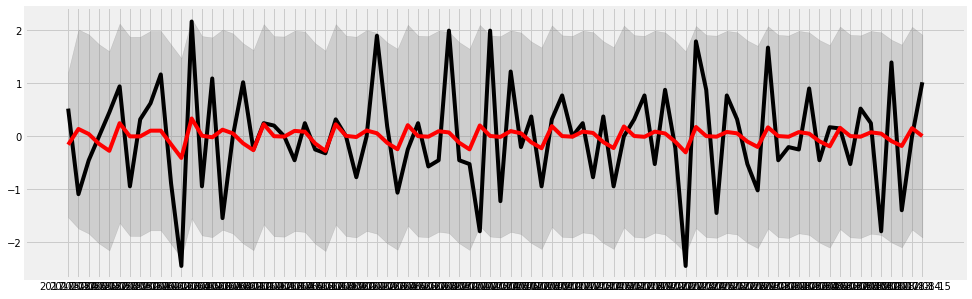

In [24]:
cf= pd.DataFrame(confint)
# prediction_series = pd.Series(prediction,index=arima_y_valid.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(arima_y_valid[zdl_targetColNm], color='black')#, title='validation - '+zdl_targetsNms[0])
    #    legend = zdl_targetsNms[0])
ax.plot(prediction, color = 'red', rot=90)#, legend = 'prediction')
ax.fill_between(prediction.index,
                cf[0],
                cf[1],color='grey',alpha=.3)
plt.show();

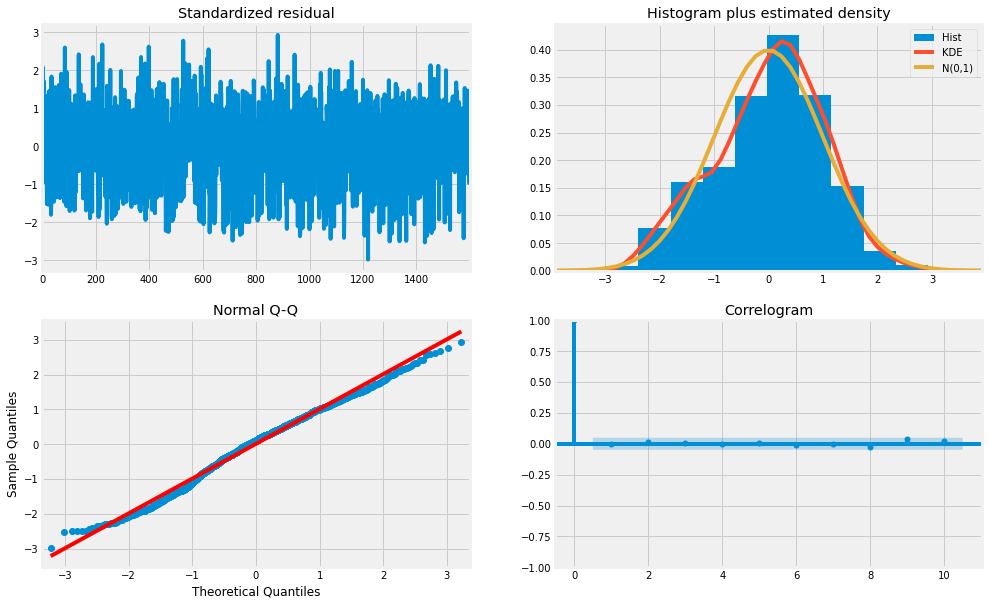

In [25]:
autoArima.plot_diagnostics(figsize=(15,10))
plt.show();

### VARMAX model

In [26]:
# zdly_train['zdl_SEAFOOD_52_sales'].plot()
pd.DataFrame(zdl_scaler.scale_).describe()

,0
count,1782.000000
mean,0.648609
std,0.312272
min,0.043670
25%,0.519414
50%,0.604823
75%,0.716691
max,2.780033


In [70]:
# zdly_train.corr()
# zdly_train.shape[1]
#len(families)*len(stores)

MemoryError: Unable to allocate 6.06 GiB for an array with shape (28512, 28512) and data type float64

In [28]:
zdly_train.head()

,zdl_AUTOMOTIVE_1_sales(t+1),zdl_AUTOMOTIVE_2_sales(t+1),zdl_AUTOMOTIVE_3_sales(t+1),zdl_AUTOMOTIVE_4_sales(t+1),zdl_AUTOMOTIVE_5_sales(t+1),zdl_AUTOMOTIVE_6_sales(t+1),zdl_AUTOMOTIVE_7_sales(t+1),zdl_AUTOMOTIVE_8_sales(t+1),zdl_AUTOMOTIVE_9_sales(t+1),zdl_AUTOMOTIVE_10_sales(t+1),...,zdl_SEAFOOD_45_sales(t+16),zdl_SEAFOOD_46_sales(t+16),zdl_SEAFOOD_47_sales(t+16),zdl_SEAFOOD_48_sales(t+16),zdl_SEAFOOD_49_sales(t+16),zdl_SEAFOOD_50_sales(t+16),zdl_SEAFOOD_51_sales(t+16),zdl_SEAFOOD_52_sales(t+16),zdl_SEAFOOD_53_sales(t+16),zdl_SEAFOOD_54_sales(t+16)
2013-01-01,1.222822,2.757599,3.372896,3.037553,2.702279,1.715303,2.441822,2.472943,2.302831,1.607483,...,-0.618021,-0.928758,-0.668761,-0.606990,-1.139807,-0.322762,-0.581763,-0.006697,-0.001473,0.475147
2013-01-02,0.318884,-0.511786,-0.452641,-1.400600,-0.471372,-0.359037,-0.904812,-1.652975,1.726142,-0.336077,...,1.350153,1.059203,0.732231,-0.067454,0.348965,1.382778,0.566531,-0.006697,-0.001473,-1.294602
2013-01-03,-0.001793,-0.511786,-0.980336,0.818477,0.464356,0.630449,-0.002635,2.225751,-4.039440,-0.002065,...,0.207280,0.441991,0.363534,1.167491,0.636402,-0.230098,0.011980,-0.006697,-0.001473,0.813644
2013-01-04,0.450176,0.506869,1.655794,0.261274,-0.471372,-0.002550,-0.002635,-0.201484,4.285664,-1.277602,...,0.236284,-0.100127,0.816996,0.531502,0.244515,0.077578,0.159654,-0.006697,-0.001473,1.629224
2013-01-05,-0.774438,0.191179,0.100219,-0.825016,1.092841,0.223377,-0.002635,-0.540691,0.168390,-0.002065,...,-1.336308,-0.447409,-1.074190,-1.650444,-0.846958,0.116438,-0.647336,-0.006697,-0.001473,-2.448680


In [29]:
# https://analyticsindiamag.com/a-guide-to-varma-with-auto-arima-in-time-series-modelling/
from statsmodels.tsa.statespace.varmax import VARMAX
# someTargets
varmax = VARMAX(endog=zdly_train, 
                #exog=x_train, 
                order=(1, 1))
varmax.fit(maxiter=10, disp=False)
print(varmax.summary())

C:\Users\praf6\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\praf6\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MemoryError: Unable to allocate 12.1 GiB for an array with shape (28512, 57024, 1) and data type float64

### Manual-based Decision Tree

In [117]:
from sklearn.tree import DecisionTreeRegressor
mTree = getModel(modelObj=DecisionTreeRegressor(random_state=0, min_samples_leaf = .01),
                  x_train=zdlx_train, y_train=zdly_train, 
                  x_valid=zdlx_valid, y_valid=zdly_valid,
                  verbose=2)
# PLOTING THE TREE
# fig = plt.figure(figsize=(25, 20))
# _ = tree.plot_tree(tree_reg, max_depth=1, feature_names=x_train.columns,
#                    class_names=targetsNms, filled=True)
saveModel(model=mTree, label = 'mTree')
printPerformanceMeasures(model=mTree, label = 'mTree')


>>>  DecisionTreeRegressor_mTree  saved!
 |train ok..  |validation ok..  *********** Rank via SMAPE in the validation set *********** 
                         model        mape-t        mape-v  smape-t  smape-v
0         LinearRegression_lin  2.300000e+11  2.200000e+15     0.26     0.49
1  DecisionTreeRegressor_mTree  4.300000e+11  1.700000e+16     0.37     0.59


C:\Users\praf6\AppData\Local\Temp\ipykernel_7956\3174122785.py:5: RuntimeWarning: invalid value encountered in divide
  SAPE = np.abs(target - forecast) / ((np.abs(forecast) + np.abs(target))/2)


In [118]:
saveKaggleSubmissionFile(model=mTree, label = 'mTree')


 |test ok.. >>> 20230211_162732_DecisionTreeRegressor_mTree_submission.csv saved!


### Manual-Based Random Forest

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.datasets import make_regression
# X, y = make_regression(n_features=4, n_informative=2, n_targets=2,
#                         random_state=0, shuffle=False)
# trash = RandomForestRegressor(max_depth=2, random_state=0)
# trash.fit(X, y)

In [119]:
from sklearn.ensemble import RandomForestRegressor
modelObj = RandomForestRegressor(random_state=0, min_samples_split=32)
mForest = getModel(modelObj=modelObj,
                  x_train=zdlx_train, y_train=zdly_train, 
                  x_valid=zdlx_valid, y_valid=zdly_valid, verbose=1
)
saveModel(model=mForest, label='mForest')


>>>  RandomForestRegressor_mForest  saved!


In [120]:
printPerformanceMeasures(model=mForest, label = 'mForest')
saveKaggleSubmissionFile(model=mForest, label = 'mForest')

 |train ok..  |validation ok.. 

C:\Users\praf6\AppData\Local\Temp\ipykernel_7956\3174122785.py:5: RuntimeWarning: invalid value encountered in divide
  SAPE = np.abs(target - forecast) / ((np.abs(forecast) + np.abs(target))/2)


 *********** Rank via SMAPE in the validation set *********** 
                           model        mape-t        mape-v  smape-t  smape-v
0           LinearRegression_lin  2.300000e+11  2.200000e+15     0.26     0.49
1    DecisionTreeRegressor_mTree  4.300000e+11  1.700000e+16     0.37     0.59
2  RandomForestRegressor_mForest  1.200000e+12  1.600000e+16     0.47     0.60
 |test ok.. >>> 20230211_162816_RandomForestRegressor_mForest_submission.csv saved!


### Manual-based XGBoost

In [127]:
# https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
# !pip install lightgbm
# import lightgbm as lgb
import xgboost as xgb
mXgb = getModel(modelObj=xgb.XGBRegressor(random_state=0, early_stopping_rounds=2),#, objective='reg:squaredlogerror'),
                #   n_estimators=10, max_depth=5, colsample_bytree=.2),
                x_train=zdlx_train, y_train=zdly_train,
                x_valid=zdlx_valid, y_valid=zdly_valid,
                verbose=1)
saveModel(model=mXgb, label='mXgb')
printPerformanceMeasures(mXgb, label='mXgb')
saveKaggleSubmissionFile(model=mXgb, label='mXgb')

[0]	validation_0-rmse:0.79401
[1]	validation_0-rmse:0.81168
[2]	validation_0-rmse:0.84497
>>>  XGBRegressor_mXgb  saved!
 |train ok..  |validation ok.. 

C:\Users\praf6\AppData\Local\Temp\ipykernel_7956\3174122785.py:5: RuntimeWarning: invalid value encountered in divide
  SAPE = np.abs(target - forecast) / ((np.abs(forecast) + np.abs(target))/2)


 *********** Rank via SMAPE in the validation set *********** 
                           model        mape-t        mape-v  smape-t  smape-v
0           LinearRegression_lin  2.300000e+11  2.200000e+15     0.26     0.49
1    DecisionTreeRegressor_mTree  4.300000e+11  1.700000e+16     0.37     0.59
2  RandomForestRegressor_mForest  1.200000e+12  1.600000e+16     0.47     0.60
3              XGBRegressor_mXgb  5.200000e+12  6.300000e+16     0.58     0.60
4              XGBRegressor_mXgb  1.200000e+14  6.000000e+17     0.72     0.61
5              XGBRegressor_mXgb  2.800000e+15  5.600000e+18     0.87     0.63
 |test ok.. >>> 20230211_163543_XGBRegressor_mXgb_submission.csv saved!


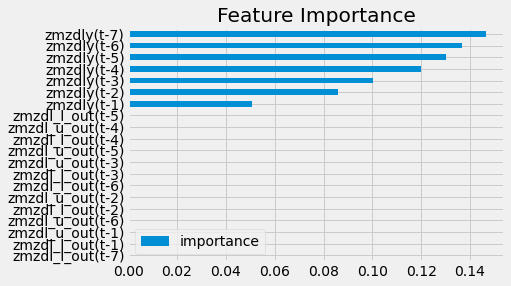

In [131]:
nFeatures = 20
fi = pd.DataFrame(data=mXgb.feature_importances_[:nFeatures],
                  index=mXgb.feature_names_in_[:nFeatures],
                  columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()


### Manual-based SVR

In [ ]:
from sklearn.svm import SVR
mSvr = getModel(modelObj=SVR(C=.5, epsilon=0.2, kernel='poly'),
                #   n_estimators=10, max_depth=5, colsample_bytree=.2),
                x_train=zdlx_train, y_train=zdly_train,
                x_valid=zdlx_valid, y_valid=zdly_valid,
                verbose=1)
saveModel(model=mSvr, label='mSvr')
printPerformanceMeasures(mSvr, label='mSvr')
saveKaggleSubmissionFile(model=mSvr, label='mSvr')


### Manual-based Keras-TensorFlow ANN

In [ ]:
import tensorflow as tf
from tensorflow import keras
# Model Architecture Compilation


def getCompiledTfAnnModel(nHiddenLayers=0, nNeurons=0, learningRate=3e-3, dropoutRate=.2):
    # Model architecture
    tfAnn_reg = keras.models.Sequential(name="MLP_TF_ANN")
    tfAnn_reg.add(keras.layers.InputLayer(name="input_layer",
                  input_shape=(len(zdlx_train[0]),)))  # input layer
    tfAnn_reg.add(keras.layers.Dropout(dropoutRate))  # dropout
    # tfAnn_reg.add(keras.layers.Dense(name = "input_and_1st_hidden_layer", units = nNeurons, input_shape =(x_train.shape[1],), activation='relu'))#input layer shape and first hidden layer
    for i in range(1, nHiddenLayers+1):
        tfAnn_reg.add(keras.layers.Dense(name=("hidden_layer_" + str(i)),
                      units=nNeurons, activation='relu'))  # hidden layer # i
        tfAnn_reg.add(keras.layers.Dropout(dropoutRate))
    tfAnn_reg.add(keras.layers.Dense(name="output_layer",
                  units=1, activation='linear'))  # output layer
    optimizer = keras.optimizers.SGD(learning_rate=learningRate)
    tfAnn_reg.compile(loss='mse', optimizer=optimizer, metrics='mae')
    return (tfAnn_reg)


mTfAnn = getModel(modelObj=getCompiledTfAnnModel(nHiddenLayers=1, nNeurons=10,
                                                 learningRate=1e-3, dropoutRate=.0),
                  x_train=zdlx_train, y_train=zdly_train,
                  x_valid=zdlx_valid, y_valid=zdly_valid,
                  verbose=1)
saveModel(model=mTfAnn, label='mTfAnn')
printPerformanceMeasures(model=mTfAnn, label='mTfAnn')
saveKaggleSubmissionFile(model=mTfAnn, label='mTfAnn')


## Hyperparameters Bayesian Optimization

In [ ]:
# probabilistic optimization via BayesSearchCV
# https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f
# !pip install scikit-optimize
from skopt import BayesSearchCV
from skopt.plots import plot_objective
from skopt.space import Real, Categorical, Integer
import tensorflow as tf
from tensorflow import keras


def getOptimalModelViaBayesSearchCv(modelObj, parsDists, x_train, y_train, x_valid, y_valid,
                                    verbose=False, epochs=150, batch_size=32, 
                                    validation_split=.2, n_jobs=4, buildForce=False):
    model = None if buildForce else getSavedModel(modelObj)
    if model is None:
        # log-uniform: understand as search over p = exp(x) by varying x
        opt = BayesSearchCV(modelObj, parsDists, n_iter=32,  cv=3, return_train_score=True,
                            scoring='neg_mean_squared_log_error', verbose=verbose, n_jobs=n_jobs)
        formalism = type(modelObj).__name__
        if formalism == 'XGBRegressor' or formalism == 'LGBRegressor':
            eval_set = [(x_valid, y_valid)]
            opt.fit(x_train, y_train, eval_set=eval_set, verbose=verbose, early_stopping_rounds = 2)
        elif formalism == 'KerasRegressor':
            early_stopping_cb = keras.callbacks.EarlyStopping(
                monitor='val_loss', patience=10, restore_best_weights=True)
            opt.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_split=validation_split, callbacks=[early_stopping_cb])
        else:
            try:
                opt.fit(x_train, y_train)
            except Exception:
                try:
                    opt.fit(x_train, y_train.values.ravel())
                except Exception:
                    print('>>>>>> Trouble in ', formalism, ' <<<<<<< \n', Exception)
                    return None
                    # pass
        parNames = [name for name, value in parsDists.items()]
        _ = plot_objective(opt.optimizer_results_[0],
                           dimensions=parNames,
                           n_minimum_search=int(1e8))
        plt.show()
        print('best_params= ', opt.best_params_)
        print('best_score (RMSLE) = ', np.sqrt(-opt.best_score_))
        model = opt.best_estimator_
        saveModel(model)
        saveKaggleSubmissionFile(models=[model])
    return (model)


### Near optimal Decision Tree via BayesSearchCV

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt

parsDists = {'splitter': ["best", "random"],  # categorical parameter
             # integer valued parameter
             'max_depth': (1, zdlx_train.shape[1]),
             'min_samples_split': (np.max([2, round(.001*zdlx_train.shape[0])]),
                                   np.min([20, round(.01*zdlx_train.shape[0])])),
             'min_samples_leaf':  (np.max([2, round(.001*zdlx_train.shape[0])]),
                                   np.min([20, round(.01*zdlx_train.shape[0])])),
             'max_features': (1, zdlx_train.shape[1]),
             # log-uniform: understand as search over p = exp(x) by varying x
             'ccp_alpha': (1e-10, 1, 'log-uniform')
             }
oTree = getOptimalModelViaBayesSearchCv(modelObj=DecisionTreeRegressor(random_state=0),
                                        parsDists=parsDists,
                                        x_train=zdlx_train, y_train=zdly_train,
                                        x_valid=zdlx_valid, y_valid=zdly_valid,
                                        verbose=2, n_jobs = 4, buildForce = True)
printPerformanceMeasures(oTree)
PLOTING THE TREE
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(oTree, max_depth=1, feature_names=x_train.columns,
                   class_names=zdl_targetsNms, filled=True)


### Near optimal Light GBoost via BayesSearchCV

In [ ]:
#https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
# !pip install lightgbm
# import lightgbm as lgb
# oLgb = getOptimalModelViaBayesSearchCv(modelObj=lgb.LGBMRegressor(random_state=0, 
#                                         objective='reg:squaredlogerror'),
#                                         parsDists={
#     'n_estimators': Integer(1, 100, 'uniform'),
#     'max_depth': Integer(1, zdlx_train.shape[1], 'uniform'),
#     'num_leaves': Integer(1, zdlx_train.shape[1], 'uniform'),
#     'learning_rate': Real(.1e-6, 1, 'log-uniform')},
#     x_train=zdlx_train, y_train=zdly_train, x_valid=zdlx_valid, y_valid=zdly_valid, verbose=0)
# printPerformanceMeasures(oLgb)

#### Feature Importance

In [ ]:
# nFeatures = 20
# fi = pd.DataFrame(data=oLgb.feature_importances_[:nFeatures],
#              index=oLgb.feature_names_in_[:nFeatures],
#              columns=['importance'])
# fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
# plt.show()

### Near optimal XGBoost via BayesSearchCV

In [ ]:
# import xgboost as xgb
# oXgb = getOptimalModelViaBayesSearchCv(modelObj=xgb.XGBRegressor(seed=0, 
#                                         objective='reg:squaredlogerror'),
#                                         parsDists={
#     'n_estimators': Integer(2, 10, 'uniform'),
#     'max_depth': Integer(1, zdlx_train.shape[1], 'uniform'),
#     'eta': Real(.001, .1, 'uniform'),
#     'colsample_bytree': Real(.1, 1, 'uniform'),
#     'learning_rate': Real(.1e-6, 1, 'log-uniform')},
#     x_train=zdlx_train, y_train=zdly_train, x_valid=zdlx_valid, y_valid=zdly_valid, verbose=0)
# printPerformanceMeasures([oXgb])

#### Feature Importance

In [ ]:
# nFeatures = 20
# fi = pd.DataFrame(data=oXgb.feature_importances_[:nFeatures],
#              index=oXgb.feature_names_in_[:nFeatures],
#              columns=['importance'])
# fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
# plt.show()

#### Forecast validation series

In [ ]:
# predictionColsNms = [(trialTargetsNms + '_prediction') for targetNm in trialTargetsNms]
# # print(predictionColsNms)
# ts_validation[predictionColsNms] = oXgb.predict(x_valid)#.round(decimals=0)
# ts_validation[trialTargetsNms + predictionColsNms].head()

In [ ]:
# ts_train_validation= pd.merge(left=ts_train_validation, right=ts_validation[predictionColsNms], how='left', left_index=True, right_index=True)
# ts_train_validation[predictionColsNms+trialTargetsNms].head(-3)

In [ ]:
# ax = ts_train_validation[trialTargetsNms[0]].plot(figsize=(15, 5), linewidth = .5)
# ts_train_validation[predictionColsNms[0]].plot(ax=ax, style='-.', linewidth = .5)
# # ax.axvline(splitDate, color='black', ls='--')
# plt.legend(trialTargetsNms + predictionColsNms)
# ax.set_title('Raw Dat and Prediction')
# plt.show()